In [49]:
import pandas as pd
import numpy as np
import scipy 

In [50]:
data = pd.read_csv('data.txt', sep = '\t')

In [51]:
data.head()

,Hugo_Symbol,Entrez_Gene_Id,TCGA-FA-8693-01,TCGA-FA-A4BB-01,TCGA-FA-A4XK-01,TCGA-FA-A6HN-01,TCGA-FA-A6HO-01,TCGA-FA-A7DS-01,TCGA-FA-A7Q1-01,TCGA-FA-A82F-01,...,TCGA-GS-A9TW-01,TCGA-GS-A9TX-01,TCGA-GS-A9TY-01,TCGA-GS-A9TZ-01,TCGA-GS-A9U3-01,TCGA-GS-A9U4-01,TCGA-RQ-A68N-01,TCGA-RQ-A6JB-01,TCGA-RQ-AAAT-01,TCGA-VB-A8QN-01
0,LOC100130426100130426,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.3784,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN
1,UBE2Q2P3,100133144.0,0.2146,0.0000,2.1119,6.4029,5.7976,3.0010,3.6571,0.7206,...,2.2995,7.8606,0.0000,1.9292,4.2376,4.6456,2.1121,3.3878,0.0000,1.2720
2,UBE2Q2P3,100134869.0,1.7366,5.8437,4.5315,6.3735,3.3294,0.8341,4.2426,5.3300,...,8.3957,3.7542,1.9034,2.8441,4.2802,9.4604,1.0720,1.6990,6.6152,4.7850
3,HMGB1P1,10357.0,325.8780,83.1264,196.2972,129.0516,142.7460,255.6759,105.3578,353.2178,...,319.0457,210.5770,224.5333,149.1209,144.4208,121.4106,144.4322,199.4649,151.1466,164.2217
4,TIMM23,10431.0,1658.0488,2001.4609,777.6224,909.5823,875.0000,1192.7133,890.7993,1677.6678,...,979.4323,732.8587,1027.8299,866.3484,793.8671,1449.1595,1580.3900,965.4808,1890.8490,1439.7335


In [52]:
metadata = pd.read_csv('metadata.txt', sep = '\t')

In [53]:
metadata

,PATIENT_ID,SAMPLE_ID,OTHER_SAMPLE_ID,SPECIMEN_CURRENT_WEIGHT,DAYS_TO_COLLECTION,DAYS_TO_SPECIMEN_COLLECTION,SPECIMEN_FREEZING_METHOD,SAMPLE_INITIAL_WEIGHT,SPECIMEN_SECOND_LONGEST_DIMENSION,IS_FFPE,...,SAMPLE_TYPE_ID,SHORTEST_DIMENSION,TIME_BETWEEN_CLAMPING_AND_FREEZING,TIME_BETWEEN_EXCISION_AND_FREEZING,VIAL_NUMBER,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,SOMATIC_STATUS,TMB_NONSYNONYMOUS
0,TCGA-FF-8041,TCGA-FF-8041-01,738a6fd7-d8e1-4fc3-9f73-ad6c9b67da2a,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],NO,...,1,[Not Available],[Not Available],[Not Available],A,DLBCLNOS,Non-Hodgkin Lymphoma,Diffuse Large B-Cell Lymphoma,Matched,5.400000
1,TCGA-FF-8042,TCGA-FF-8042-01,562f76eb-cd16-4eec-9b31-3e5deee3497c,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],NO,...,1,[Not Available],[Not Available],[Not Available],A,DLBCLNOS,Non-Hodgkin Lymphoma,Diffuse Large B-Cell Lymphoma,Matched,7.533333
2,TCGA-FF-8043,TCGA-FF-8043-01,dec7125d-7e6c-4d05-9911-c3ff2a8e2b73,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],NO,...,1,[Not Available],[Not Available],[Not Available],A,DLBCLNOS,Non-Hodgkin Lymphoma,Diffuse Large B-Cell Lymphoma,Matched,3.100000
3,TCGA-FF-8046,TCGA-FF-8046-01,6c8a582b-70b0-4c94-98c8-e800a95ae112,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],NO,...,1,[Not Available],[Not Available],[Not Available],A,DLBCLNOS,Non-Hodgkin Lymphoma,Diffuse Large B-Cell Lymphoma,Matched,2.266667
4,TCGA-FF-8047,TCGA-FF-8047-01,a592550c-97b4-4a82-a088-14a5ac6bf084,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],NO,...,1,[Not Available],[Not Available],[Not Available],A,DLBCLNOS,Non-Hodgkin Lymphoma,Diffuse Large B-Cell Lymphoma,Matched,3.433333
5,TCGA-FF-8061,TCGA-FF-8061-01,047caecb-6829-4943-bbc5-f45eed3979b6,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.6,NO,...,1,0.4,[Not Available],[Not Available],A,DLBCLNOS,Non-Hodgkin Lymphoma,Diffuse Large B-Cell Lymphoma,Matched,4.633333
6,TCGA-FF-8062,TCGA-FF-8062-01,a1dacfbb-042b-496e-94a4-046dc04e27b5,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.9,NO,...,1,0.5,[Not Available],[Not Available],A,DLBCLNOS,Non-Hodgkin Lymphoma,Diffuse Large B-Cell Lymphoma,Matched,4.033333
7,TCGA-FM-8000,TCGA-FM-8000-01,acf8c1b2-5321-491d-9497-20be2a573f81,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.6,NO,...,1,0.4,[Not Available],[Not Available],A,DLBCLNOS,Non-Hodgkin Lymphoma,Diffuse Large B-Cell Lymphoma,Matched,3.800000
8,TCGA-G8-6324,TCGA-G8-6324-01,c364ba15-a2b8-40f6-9716-09d40f0f7cc9,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.3,NO,...,1,0.2,[Not Available],[Not Available],A,DLBCLNOS,Non-Hodgkin Lymphoma,Diffuse Large B-Cell Lymphoma,Matched,81.733333
9,TCGA-G8-6325,TCGA-G8-6325-01,2921eff8-d57c-473b-a03b-93b934e61a5d,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.4,NO,...,1,0.4,[Not Available],[Not Available],A,DLBCLNOS,Non-Hodgkin Lymphoma,Diffuse Large B-Cell Lymphoma,Matched,16.600000


In [54]:
clinic_data = pd.read_csv('clinic_data.txt', sep = '\t')

In [55]:
clinic_data.columns

Index(['OTHER_PATIENT_ID', 'PATIENT_ID', 'FORM_COMPLETION_DATE',
       'HISTOLOGICAL_DIAGNOSIS', 'LYMPH_NODE_INVOLVEMENT_SITE',
       'EXTRANODAL_INVOLVMENT_OTHER', 'EXTRANODAL_INVOLVEMENT',
       'FOLLICULAR_COMPONENT_PERCENT', 'HIV_STATUS',
       'HISTORY_OTHER_MALIGNANCY', 'HISTORY_NEOADJUVANT_TRTYN',
       'PROSPECTIVE_COLLECTION', 'RETROSPECTIVE_COLLECTION', 'SEX', 'RACE',
       'ETHNICITY', 'WEIGHT', 'HEIGHT', 'TUMOR_RESECTED_MAX_DIMENSION',
       'INITIAL_PATHOLOGIC_DX_YEAR', 'AJCC_STAGING_EDITION',
       'AJCC_PATHOLOGIC_TUMOR_STAGE', 'EXTRANODAL_LYMPHOMATOUS_INVOLVEMENT',
       'ECOG_SCORE', 'IDH_LEVEL', 'LDH_NORM_RANGE_UPPER', 'TUMOR_STATUS',
       'BONE_MARROW_BIOPSY_PERFORMED', 'BONE_MARROW_INVOLVEMENT',
       'BONE_MARROW_SAMPLE_HISTOLOGY', 'IMMUNOPHENOTYPIC_ANALYSIS_TESTED',
       'IMMUNOPHENOTYPIC_ANALYSIS_METHOD', 'IMMUNOPHENOTYPIC_ANALYSIS_RESULTS',
       'MIB_1_POSITIVE_PERCENT_RANGE', 'B_CELL_GENOTYPE_METHOD',
       'IGH_GENOTYPE_RESULT', 'IGK_GENOTYPE_

In [56]:
clinic_data['HEIGHT']

0     169.0
1     178.0
2     165.0
3     162.0
4     158.0
5     157.0
6     157.0
7     157.0
8     156.0
9     173.0
10    171.0
11    146.0
12    178.0
13    155.0
14    171.0
15    157.0
16    162.0
17    170.0
18    154.0
19    174.0
20    155.0
21    165.5
22    171.0
23    185.0
24    164.3
25    154.2
26    178.0
27    172.0
28    166.5
29    171.5
30    168.0
31    159.5
32    155.0
33    164.7
34    155.0
35    169.0
36    183.0
37    160.0
38    165.0
39    187.0
40    153.0
41    168.0
42    157.0
43    163.0
44    162.0
45    167.0
46    162.5
47    180.0
Name: HEIGHT, dtype: float64

In [57]:
clinic_data['height_class'] = clinic_data['HEIGHT'].apply(lambda x: (x>165)*1)

In [58]:
clinic_data['SAMPLE_ID'] = clinic_data['PATIENT_ID'].apply(lambda x: x+ '-01')

In [59]:
clinic_data.loc[:,['SAMPLE_ID','height_class', 'HEIGHT']]

,SAMPLE_ID,height_class,HEIGHT
0,TCGA-FA-8693-01,1,169.0
1,TCGA-FA-A4BB-01,1,178.0
2,TCGA-FA-A4XK-01,0,165.0
3,TCGA-FA-A6HN-01,0,162.0
4,TCGA-FA-A6HO-01,0,158.0
5,TCGA-FA-A7DS-01,0,157.0
6,TCGA-FA-A7Q1-01,0,157.0
7,TCGA-FA-A82F-01,0,157.0
8,TCGA-FA-A86F-01,0,156.0
9,TCGA-FF-8041-01,1,173.0


In [60]:
import os
import pickle as pkl

from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data

In [61]:
counts_df = load_example_data(
    modality="raw_counts",
    dataset="synthetic",
    debug=False,
)

metadata = load_example_data(
    modality="metadata",
    dataset="synthetic",
    debug=False,
)

In [62]:
counts_df

,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10
sample1,12,21,4,130,18,0,16,54,49,3
sample2,1,44,2,63,11,10,70,32,57,9
sample3,4,4,11,180,21,3,28,34,65,2
sample4,1,10,2,100,44,9,28,16,33,9
sample5,1,11,6,135,16,2,32,29,31,5
...,...,...,...,...,...,...,...,...,...,...
sample96,7,26,3,67,11,4,41,44,54,1
sample97,1,14,3,71,33,5,19,42,25,4
sample98,10,36,2,72,11,2,66,27,16,9
sample99,18,14,3,66,53,11,32,19,79,11


In [63]:
data.index = data['Hugo_Symbol']
data = data.loc[:,list(data.columns)[2:]]

In [64]:
data = data.T

In [65]:
metadata

,condition,group
sample1,A,X
sample2,A,Y
sample3,A,X
sample4,A,Y
sample5,A,X
...,...,...
sample96,B,Y
sample97,B,X
sample98,B,Y
sample99,B,X


In [66]:
metadata = clinic_data[['SAMPLE_ID', 'height_class']]
metadata.index = metadata['SAMPLE_ID']
metadata = metadata.loc[:,['height_class']]

In [67]:
data = data.fillna(0)

In [68]:
data = data.astype(float).round().astype(int)

In [69]:
len(set(data.columns))

20514

In [70]:
len(data.columns)

20531

In [71]:
data = data.loc[:,data.columns[~data.columns.duplicated()]]

In [72]:
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    counts=data,
    metadata=metadata,
    design_factors="height_class",  # compare samples based on the "condition"
    # column ("B" vs "A")
    refit_cooks=True,
    inference=inference,
)

C:\Users\jerry\anaconda3\Lib\site-packages\anndata\_core\aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
C:\Users\jerry\anaconda3\Lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\jerry\AppData\Local\Temp\ipykernel_4788\2061315499.py:2: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(


In [74]:
dds.var_names_make_unique()

In [75]:
dds.fit_size_factors()

Fitting size factors...
... done in 0.20 seconds.



In [76]:
dds.fit_genewise_dispersions()

Fitting dispersions...
... done in 21.34 seconds.



In [77]:
dds.fit_dispersion_trend()

Fitting dispersion trend curve...
... done in 1.81 seconds.



In [78]:
dds.fit_dispersion_prior()

In [79]:
dds.fit_MAP_dispersions()

Fitting MAP dispersions...
... done in 25.28 seconds.



In [80]:
dds.fit_LFC()

Fitting LFCs...
... done in 12.78 seconds.



In [81]:
dds.calculate_cooks()

Calculating cook's distance...
... done in 0.30 seconds.



In [82]:
dds.refit_cooks = False

In [83]:
stat_res = DeseqStats(dds, alpha=0.05, cooks_filter=True, independent_filter=True)

In [84]:
stat_res.run_wald_test()

Running Wald tests...
... done in 5.59 seconds.



In [85]:
stat_res._p_value_adjustment()

In [86]:
stat_res.summary()

Log2 fold change & Wald test p-value: height-class 1 vs 0
                          baseMean  log2FoldChange     lfcSE      stat  \
Hugo_Symbol                                                              
LOC100130426100130426     0.041560        0.299531  3.041302  0.098488   
UBE2Q2P3                  3.122496        0.001317  0.387051  0.003403   
UBE2Q2P3-1                4.197432        0.000411  0.494915  0.000830   
HMGB1P1                 208.344559       -0.087905  0.180752 -0.486330   
TIMM23                 1379.555818        0.160788  0.159245  1.009689   
...                            ...             ...       ...       ...   
ZYX                    5426.368892        0.063069  0.184117  0.342549   
FLJ10821               1154.804563       -0.099108  0.169934 -0.583217   
ZZZ3                    503.577426        0.075243  0.149837  0.502167   
TPTEP1                   25.608091        1.231440  0.389017  3.165513   
AKR1C6P                   0.407222       -1.179849  1.

In [87]:
stat_res.lfc_shrink(coeff="height-class_1_vs_0")

Fitting MAP LFCs...
... done in 30.37 seconds.



Shrunk log2 fold change & Wald test p-value: height-class 1 vs 0
                          baseMean  log2FoldChange     lfcSE      stat  \
Hugo_Symbol                                                              
LOC100130426100130426     0.041560        0.000687  0.125765  0.098488   
UBE2Q2P3                  3.122496        0.000033  0.070799  0.003403   
UBE2Q2P3-1                4.197432        0.000011  0.071374  0.000830   
HMGB1P1                 208.344559       -0.006717  0.067041 -0.486330   
TIMM23                 1379.555818        0.015937  0.070778  1.009689   
...                            ...             ...       ...       ...   
ZYX                    5426.368892        0.004424  0.068089  0.342549   
FLJ10821               1154.804563       -0.009142  0.066940 -0.583217   
ZZZ3                    503.577426        0.008515  0.066600  0.502167   
TPTEP1                   25.608091        0.900397  0.426423  3.165513   
AKR1C6P                   0.407222       -0.001

In [88]:
results = stat_res.results_df

In [89]:
results

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Hugo_Symbol,,,,,,
LOC100130426100130426,0.041560,0.000687,0.125765,0.098488,0.921545,0.999454
UBE2Q2P3,3.122496,0.000033,0.070799,0.003403,0.997285,0.999454
UBE2Q2P3-1,4.197432,0.000011,0.071374,0.000830,0.999338,0.999943
HMGB1P1,208.344559,-0.006717,0.067041,-0.486330,0.626733,0.999454
TIMM23,1379.555818,0.015937,0.070778,1.009689,0.312644,0.903168
...,...,...,...,...,...,...
ZYX,5426.368892,0.004424,0.068089,0.342549,0.731938,0.999454
FLJ10821,1154.804563,-0.009142,0.066940,-0.583217,0.559747,0.999454
ZZZ3,503.577426,0.008515,0.066600,0.502167,0.615550,0.999454


In [90]:
import matplotlib.pyplot as plt

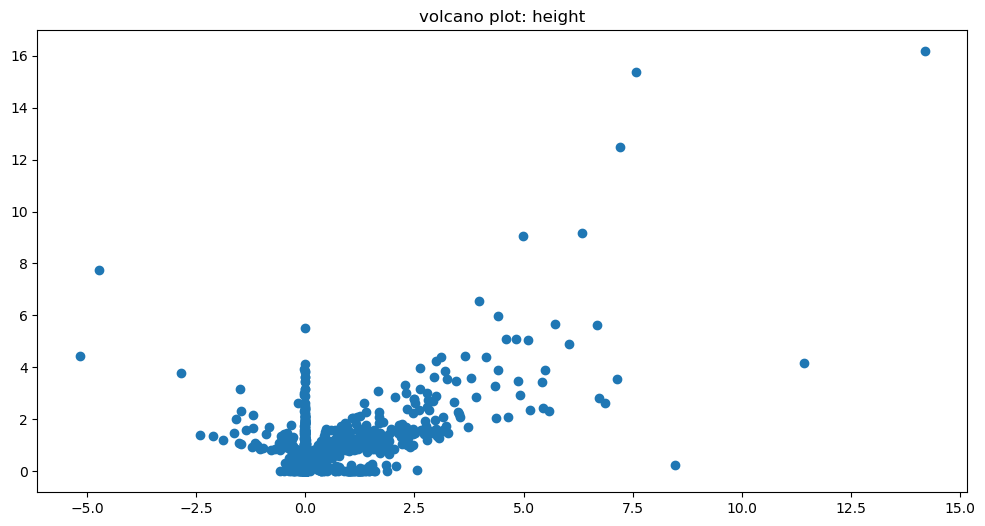

In [95]:
plt.figure(figsize = (12,6))
plt.scatter(results['log2FoldChange'], -np.log10(results['padj']))
plt.title('volcano plot: height')
plt.show()

In [96]:
results.to_csv('final_stats_height.csv')

In [8]:
clinic_data['WEIGHT']

0      82.0
1      85.0
2      60.0
3      58.0
4      61.0
5      60.0
6      65.0
7      50.0
8      67.0
9      58.9
10     89.9
11     41.5
12     81.9
13     52.5
14     48.1
15     60.1
16     43.9
17     73.0
18     51.0
19     66.0
20     69.5
21     60.0
22    105.7
23    127.7
24     59.2
25     91.8
26     90.5
27     72.5
28     77.5
29     68.0
30     76.1
31    117.1
32     54.5
33     96.8
34     68.0
35     85.0
36     90.0
37     58.0
38     54.0
39     85.0
40     77.0
41     68.0
42     80.0
43     50.0
44     58.0
45     72.0
46     68.2
47     75.0
Name: WEIGHT, dtype: float64

In [15]:
clinic_data['weight_class'] = clinic_data['WEIGHT'].apply(lambda x: (x>60)*1)

In [16]:
clinic_data['SAMPLE_ID'] = clinic_data['PATIENT_ID'].apply(lambda x: x+ '-01')

In [17]:
clinic_data.loc[:,['SAMPLE_ID','weight_class', 'WEIGHT']]

,SAMPLE_ID,weight_class,WEIGHT
0,TCGA-FA-8693-01,1,82.0
1,TCGA-FA-A4BB-01,1,85.0
2,TCGA-FA-A4XK-01,0,60.0
3,TCGA-FA-A6HN-01,0,58.0
4,TCGA-FA-A6HO-01,1,61.0
5,TCGA-FA-A7DS-01,0,60.0
6,TCGA-FA-A7Q1-01,1,65.0
7,TCGA-FA-A82F-01,0,50.0
8,TCGA-FA-A86F-01,1,67.0
9,TCGA-FF-8041-01,0,58.9


In [18]:
import os
import pickle as pkl

from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data

In [19]:
counts_df = load_example_data(
    modality="raw_counts",
    dataset="synthetic",
    debug=False,
)

metadata = load_example_data(
    modality="metadata",
    dataset="synthetic",
    debug=False,
)

In [20]:
counts_df

,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10
sample1,12,21,4,130,18,0,16,54,49,3
sample2,1,44,2,63,11,10,70,32,57,9
sample3,4,4,11,180,21,3,28,34,65,2
sample4,1,10,2,100,44,9,28,16,33,9
sample5,1,11,6,135,16,2,32,29,31,5
...,...,...,...,...,...,...,...,...,...,...
sample96,7,26,3,67,11,4,41,44,54,1
sample97,1,14,3,71,33,5,19,42,25,4
sample98,10,36,2,72,11,2,66,27,16,9
sample99,18,14,3,66,53,11,32,19,79,11


In [21]:
data.index = data['Hugo_Symbol']
data = data.loc[:,list(data.columns)[2:]]

In [22]:
data = data.T

In [23]:
metadata

,condition,group
sample1,A,X
sample2,A,Y
sample3,A,X
sample4,A,Y
sample5,A,X
...,...,...
sample96,B,Y
sample97,B,X
sample98,B,Y
sample99,B,X


In [24]:
metadata = clinic_data[['SAMPLE_ID', 'weight_class']]
metadata.index = metadata['SAMPLE_ID']
metadata = metadata.loc[:,['weight_class']]

In [25]:
data = data.fillna(0)

In [26]:
data = data.astype(float).round().astype(int)

In [27]:
len(set(data.columns))

20514

In [28]:
len(data.columns)

20531

In [29]:
data = data.loc[:,data.columns[~data.columns.duplicated()]]

In [30]:
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    counts=data,
    metadata=metadata,
    design_factors="weight_class",  # compare samples based on the "condition"
    # column ("B" vs "A")
    refit_cooks=True,
    inference=inference,
)

C:\Users\jerry\anaconda3\Lib\site-packages\anndata\_core\aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
C:\Users\jerry\anaconda3\Lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\jerry\AppData\Local\Temp\ipykernel_14220\1041841282.py:2: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(


In [31]:
dds.var_names_make_unique()

In [32]:
dds.fit_size_factors()

Fitting size factors...
... done in 0.09 seconds.



In [33]:
dds.fit_genewise_dispersions()

Fitting dispersions...
... done in 7.74 seconds.



In [34]:
dds.fit_dispersion_trend()

Fitting dispersion trend curve...
... done in 1.11 seconds.



In [35]:
dds.fit_dispersion_prior()

In [36]:
dds.fit_MAP_dispersions()

Fitting MAP dispersions...
... done in 8.56 seconds.



In [37]:
dds.fit_LFC()

Fitting LFCs...
... done in 8.85 seconds.



In [38]:
dds.calculate_cooks()

Calculating cook's distance...
... done in 0.18 seconds.



In [40]:
dds.refit_cooks = False

In [41]:
stat_res = DeseqStats(dds, alpha=0.05, cooks_filter=True, independent_filter=True)

In [42]:
stat_res.run_wald_test()

Running Wald tests...
... done in 3.11 seconds.



In [43]:
stat_res._p_value_adjustment()

In [44]:
stat_res.summary()

Log2 fold change & Wald test p-value: weight-class 1 vs 0
                          baseMean  log2FoldChange     lfcSE      stat  \
Hugo_Symbol                                                              
LOC100130426100130426     0.041560        0.202086  3.176143  0.063626   
UBE2Q2P3                  3.122496        0.296717  0.406015  0.730802   
UBE2Q2P3-1                4.197432        0.378820  0.516315  0.733700   
HMGB1P1                 208.344559       -0.128129  0.187829 -0.682158   
TIMM23                 1379.555818       -0.010402  0.167677 -0.062036   
...                            ...             ...       ...       ...   
ZYX                    5426.368892       -0.321939  0.186467 -1.726517   
FLJ10821               1154.804563        0.015381  0.177673  0.086569   
ZZZ3                    503.577426        0.267577  0.151859  1.762007   
TPTEP1                   25.608091        1.394483  0.408240  3.415842   
AKR1C6P                   0.407222       -1.745445  1.

In [46]:
stat_res.lfc_shrink(coeff="weight-class_1_vs_0")

Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: weight-class 1 vs 0
                          baseMean  log2FoldChange     lfcSE      stat  \
Hugo_Symbol                                                              
LOC100130426100130426     0.041560        0.000103  0.075271  0.063626   
UBE2Q2P3                  3.122496        0.001184  0.044815  0.730802   
UBE2Q2P3-1                4.197432        0.000919  0.046265  0.733700   
HMGB1P1                 208.344559       -0.002438  0.041312 -0.682158   
TIMM23                 1379.555818       -0.000235  0.041783 -0.062036   
...                            ...             ...       ...       ...   
ZYX                    5426.368892       -0.007291  0.041773 -1.726517   
FLJ10821               1154.804563        0.000877  0.042180  0.086569   
ZZZ3                    503.577426        0.007701  0.046785  1.762007   
TPTEP1                   25.608091        1.077312  0.442016  3.415842   
AKR1C6P                   0.407222       -0.000

... done in 12.66 seconds.



In [47]:
results = stat_res.results_df

In [48]:
results

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Hugo_Symbol,,,,,,
LOC100130426100130426,0.041560,0.000103,0.075271,0.063626,0.949268,0.999593
UBE2Q2P3,3.122496,0.001184,0.044815,0.730802,0.464900,0.999593
UBE2Q2P3-1,4.197432,0.000919,0.046265,0.733700,0.463132,0.999593
HMGB1P1,208.344559,-0.002438,0.041312,-0.682158,0.495139,0.999593
TIMM23,1379.555818,-0.000235,0.041783,-0.062036,0.950534,0.999593
...,...,...,...,...,...,...
ZYX,5426.368892,-0.007291,0.041773,-1.726517,0.084254,0.661207
FLJ10821,1154.804563,0.000877,0.042180,0.086569,0.931014,0.999593
ZZZ3,503.577426,0.007701,0.046785,1.762007,0.078068,0.649029


In [49]:
import matplotlib.pyplot as plt

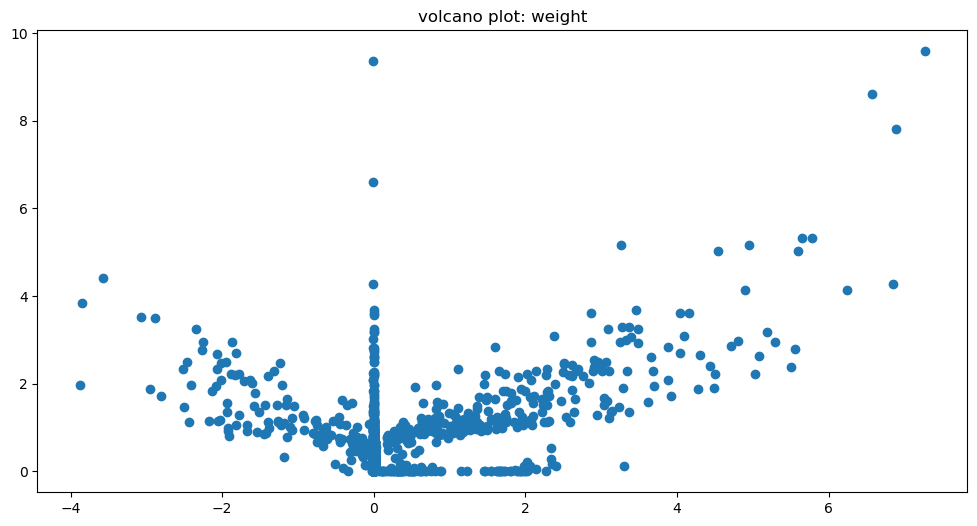

In [50]:
plt.figure(figsize = (12,6))
plt.scatter(results['log2FoldChange'], -np.log10(results['padj']))
plt.title('volcano plot: weight')
plt.show()

In [51]:
results.to_csv('final_stats_weight.csv')

In [11]:
clinic_data['OS_MONTHS']

0       4.34
1       4.34
2      23.26
3       1.91
4      24.61
5      23.62
6       8.15
7      14.03
8      18.17
9      35.51
10     31.08
11     31.70
12     24.67
13      4.14
14     27.33
15     22.31
16      9.79
17     10.28
18     25.99
19     12.65
20     31.93
21     41.13
22     51.94
23     70.01
24    211.07
25     19.55
26    116.72
27    196.45
28    150.39
29     98.00
30     51.94
31     42.67
32     43.82
33     57.13
34     32.26
35     38.21
36    128.02
37     23.98
38     53.12
39     45.11
40    109.49
41     25.13
42    111.50
43     12.84
44     25.89
45      0.03
46      0.56
47      0.00
Name: OS_MONTHS, dtype: float64

In [12]:
clinic_data['survival_class'] = clinic_data['OS_MONTHS'].apply(lambda x: (x>30)*1)

In [13]:
clinic_data['SAMPLE_ID'] = clinic_data['PATIENT_ID'].apply(lambda x: x+ '-01')

In [14]:
clinic_data.loc[:,['SAMPLE_ID','survival_class', 'OS_MONTHS']]

,SAMPLE_ID,survival_class,OS_MONTHS
0,TCGA-FA-8693-01,0,4.34
1,TCGA-FA-A4BB-01,0,4.34
2,TCGA-FA-A4XK-01,0,23.26
3,TCGA-FA-A6HN-01,0,1.91
4,TCGA-FA-A6HO-01,0,24.61
5,TCGA-FA-A7DS-01,0,23.62
6,TCGA-FA-A7Q1-01,0,8.15
7,TCGA-FA-A82F-01,0,14.03
8,TCGA-FA-A86F-01,0,18.17
9,TCGA-FF-8041-01,1,35.51


In [27]:
clinic_data['age_class'] = clinic_data[ 'AGE'].apply(lambda x: (x>60)*1)

In [28]:
clinic_data['SAMPLE_ID'] = clinic_data['PATIENT_ID'].apply(lambda x: x+ '-01')

In [29]:
clinic_data.loc[:,['SAMPLE_ID','age_class', 'AGE']]

,SAMPLE_ID,age_class,AGE
0,TCGA-FA-8693-01,1,75
1,TCGA-FA-A4BB-01,1,67
2,TCGA-FA-A4XK-01,0,40
3,TCGA-FA-A6HN-01,1,73
4,TCGA-FA-A6HO-01,0,58
5,TCGA-FA-A7DS-01,0,54
6,TCGA-FA-A7Q1-01,1,61
7,TCGA-FA-A82F-01,0,48
8,TCGA-FA-A86F-01,1,64
9,TCGA-FF-8041-01,0,28


In [15]:
import os
import pickle as pkl

from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data

In [16]:
counts_df = load_example_data(
    modality="raw_counts",
    dataset="synthetic",
    debug=False,
)

metadata = load_example_data(
    modality="metadata",
    dataset="synthetic",
    debug=False,
)

In [17]:
counts_df

,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10
sample1,12,21,4,130,18,0,16,54,49,3
sample2,1,44,2,63,11,10,70,32,57,9
sample3,4,4,11,180,21,3,28,34,65,2
sample4,1,10,2,100,44,9,28,16,33,9
sample5,1,11,6,135,16,2,32,29,31,5
...,...,...,...,...,...,...,...,...,...,...
sample96,7,26,3,67,11,4,41,44,54,1
sample97,1,14,3,71,33,5,19,42,25,4
sample98,10,36,2,72,11,2,66,27,16,9
sample99,18,14,3,66,53,11,32,19,79,11


In [18]:
data.index = data['Hugo_Symbol']
data = data.loc[:,list(data.columns)[2:]]

In [19]:
data = data.T

In [20]:
metadata

,condition,group
sample1,A,X
sample2,A,Y
sample3,A,X
sample4,A,Y
sample5,A,X
...,...,...
sample96,B,Y
sample97,B,X
sample98,B,Y
sample99,B,X


In [21]:
metadata = clinic_data[['SAMPLE_ID', 'survival_class']]
metadata.index = metadata['SAMPLE_ID']
metadata = metadata.loc[:,['survival_class']]

In [22]:
data = data.fillna(0)

In [23]:
data = data.astype(float).round().astype(int)

In [24]:
len(set(data.columns))

20514

In [25]:
len(data.columns)

20531

In [26]:
data = data.loc[:,data.columns[~data.columns.duplicated()]]

In [27]:
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    counts=data,
    metadata=metadata,
    design_factors="survival_class",  # compare samples based on the "condition"
    # column ("B" vs "A")
    refit_cooks=True,
    inference=inference,
)

C:\Users\jerry\anaconda3\Lib\site-packages\anndata\_core\aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
C:\Users\jerry\anaconda3\Lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\jerry\AppData\Local\Temp\ipykernel_14892\3576498005.py:2: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(


In [28]:
dds.var_names_make_unique()

In [29]:
dds.fit_size_factors()

Fitting size factors...
... done in 0.10 seconds.



In [30]:
dds.fit_genewise_dispersions()

Fitting dispersions...
... done in 9.40 seconds.



In [68]:
dds.fit_dispersion_trend()

Fitting dispersion trend curve...
... done in 1.90 seconds.



In [31]:
dds.fit_dispersion_prior()

Fitting dispersion trend curve...
... done in 1.14 seconds.



In [32]:
dds.fit_MAP_dispersions()

Fitting MAP dispersions...
... done in 22.40 seconds.



In [33]:
dds.fit_LFC()

Fitting LFCs...
... done in 12.57 seconds.



In [34]:
dds.calculate_cooks()

Calculating cook's distance...
... done in 0.29 seconds.



In [35]:
dds.refit_cooks = False

In [36]:
stat_res = DeseqStats(dds, alpha=0.05, cooks_filter=True, independent_filter=True)

In [37]:
stat_res.run_wald_test()

Running Wald tests...
... done in 4.38 seconds.



In [38]:
stat_res._p_value_adjustment()

In [40]:
stat_res.summary()

Log2 fold change & Wald test p-value: survival-class 1 vs 0
                          baseMean  log2FoldChange     lfcSE      stat  \
Hugo_Symbol                                                              
LOC100130426100130426     0.041560       -0.185547  3.036355 -0.061108   
UBE2Q2P3                  3.122496       -0.027187  0.385958 -0.070440   
UBE2Q2P3-1                4.197432       -0.367519  0.491121 -0.748327   
HMGB1P1                 208.344559       -0.195647  0.178560 -1.095695   
TIMM23                 1379.555818       -0.031393  0.160433 -0.195674   
...                            ...             ...       ...       ...   
ZYX                    5426.368892        0.147730  0.182658  0.808782   
FLJ10821               1154.804563       -0.124680  0.169143 -0.737129   
ZZZ3                    503.577426       -0.117100  0.148898 -0.786445   
TPTEP1                   25.608091        0.778091  0.406625  1.913535   
AKR1C6P                   0.407222       -0.784979  

In [41]:
stat_res.lfc_shrink(coeff="survival-class_1_vs_0")

Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: survival-class 1 vs 0
                          baseMean  log2FoldChange     lfcSE      stat  \
Hugo_Symbol                                                              
LOC100130426100130426     0.041560       -0.001706  0.096053 -0.061108   
UBE2Q2P3                  3.122496       -0.001323  0.115480 -0.070440   
UBE2Q2P3-1                4.197432       -0.011377  0.114140 -0.748327   
HMGB1P1                 208.344559       -0.041756  0.110419 -1.095695   
TIMM23                 1379.555818       -0.010808  0.097324 -0.195674   
...                            ...             ...       ...       ...   
ZYX                    5426.368892        0.026864  0.107658  0.808782   
FLJ10821               1154.804563       -0.028613  0.102901 -0.737129   
ZZZ3                    503.577426       -0.029973  0.098291 -0.786445   
TPTEP1                   25.608091        0.037259  0.148235  1.913535   
AKR1C6P                   0.407222       -0.0

... done in 21.84 seconds.



In [42]:
results = stat_res.results_df

In [43]:
results

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Hugo_Symbol,,,,,,
LOC100130426100130426,0.041560,-0.001706,0.096053,-0.061108,0.951273,0.997783
UBE2Q2P3,3.122496,-0.001323,0.115480,-0.070440,0.943843,0.997783
UBE2Q2P3-1,4.197432,-0.011377,0.114140,-0.748327,0.454263,0.887687
HMGB1P1,208.344559,-0.041756,0.110419,-1.095695,0.273212,0.757878
TIMM23,1379.555818,-0.010808,0.097324,-0.195674,0.844865,0.997783
...,...,...,...,...,...,...
ZYX,5426.368892,0.026864,0.107658,0.808782,0.418641,0.867095
FLJ10821,1154.804563,-0.028613,0.102901,-0.737129,0.461044,0.892634
ZZZ3,503.577426,-0.029973,0.098291,-0.786445,0.431607,0.876136


In [45]:
import matplotlib.pyplot as plt

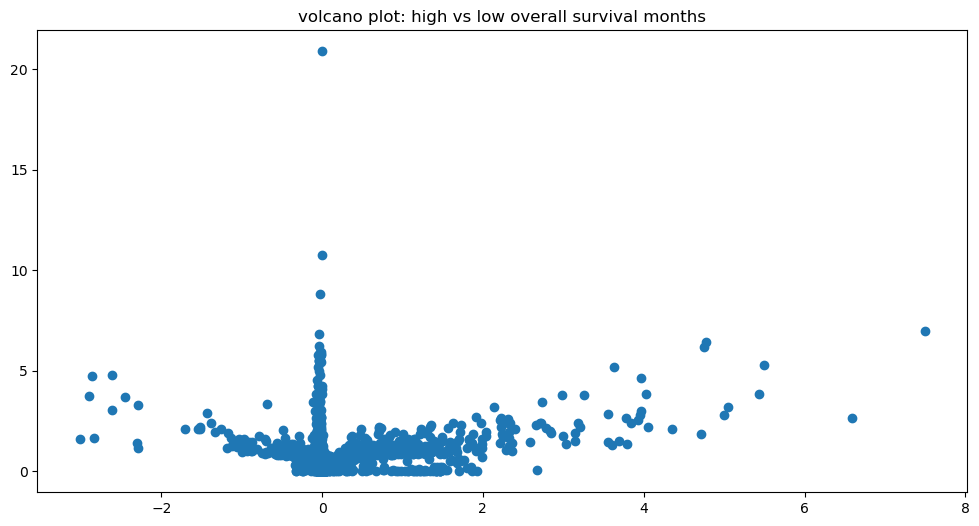

In [47]:
plt.figure(figsize = (12,6))
plt.scatter(results['log2FoldChange'], -np.log10(results['padj']))
plt.title('volcano plot: high vs low overall survival months')
plt.show()

In [48]:
results.to_csv('final_stats.csv')

In [80]:
metadata = clinic_data[['SAMPLE_ID', 'age_class']]
metadata.index = metadata['SAMPLE_ID']
metadata = metadata.loc[:,['age_class']]

In [83]:
data = data.fillna(0)

In [86]:
data = data.astype(float).round().astype(int)

In [94]:
len(set(data.columns))

20514

In [95]:
len(data.columns)

20531

In [99]:
data = data.loc[:,data.columns[~data.columns.duplicated()]]

In [100]:
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    counts=data,
    metadata=metadata,
    design_factors="age_class",  # compare samples based on the "condition"
    # column ("B" vs "A")
    refit_cooks=True,
    inference=inference,
)

C:\Users\jerry\anaconda3\Lib\site-packages\anndata\_core\aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
C:\Users\jerry\anaconda3\Lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\jerry\AppData\Local\Temp\ipykernel_18240\4032221173.py:2: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(


In [47]:
dds.var_names_make_unique()

In [48]:
dds.fit_size_factors()

Fitting size factors...
... done in 0.20 seconds.



In [49]:
dds.fit_genewise_dispersions()

Fitting dispersions...
... done in 20.56 seconds.



In [50]:
dds.fit_dispersion_trend()

Fitting dispersion trend curve...
... done in 1.92 seconds.



In [51]:
dds.fit_dispersion_prior()

In [52]:
dds.fit_MAP_dispersions()

Fitting MAP dispersions...
... done in 24.81 seconds.



In [53]:
dds.fit_LFC()

Fitting LFCs...
... done in 12.61 seconds.



In [54]:
dds.calculate_cooks()

Calculating cook's distance...
... done in 0.34 seconds.



In [55]:
dds.refit_cooks = False

In [56]:
stat_res = DeseqStats(dds, alpha=0.05, cooks_filter=True, independent_filter=True)

In [57]:
stat_res.run_wald_test()

Running Wald tests...
... done in 5.76 seconds.



In [58]:
stat_res._p_value_adjustment()

In [116]:
stat_res.summary()

Log2 fold change & Wald test p-value: age-class 1 vs 0
                          baseMean  log2FoldChange     lfcSE      stat  \
Hugo_Symbol                                                              
LOC100130426100130426     0.041560       -0.194690  3.059359 -0.063638   
UBE2Q2P3                  3.122496       -0.010877  0.388959 -0.027965   
UBE2Q2P3-1                4.197432        0.648788  0.486030  1.334872   
HMGB1P1                 208.344559       -0.051844  0.181881 -0.285041   
TIMM23                 1379.555818        0.045046  0.161550  0.278836   
...                            ...             ...       ...       ...   
ZYX                    5426.368892       -0.071407  0.184926 -0.386137   
FLJ10821               1154.804563       -0.055015  0.171147 -0.321449   
ZZZ3                    503.577426        0.218447  0.147573  1.480263   
TPTEP1                   25.608091       -0.811071  0.410092 -1.977780   
AKR1C6P                   0.407222        0.078477  1.686

In [119]:
stat_res.lfc_shrink(coeff="age-class_1_vs_0")

Fitting MAP LFCs...
... done in 110.74 seconds.



Shrunk log2 fold change & Wald test p-value: age-class 1 vs 0
                          baseMean  log2FoldChange     lfcSE      stat  \
Hugo_Symbol                                                              
LOC100130426100130426     0.041560   -2.112805e-07  0.001108 -0.063638   
UBE2Q2P3                  3.122496   -6.795340e-08  0.001357 -0.027965   
UBE2Q2P3-1                4.197432    2.893286e-06  0.001485  1.334872   
HMGB1P1                 208.344559   -1.378790e-06  0.001350 -0.285041   
TIMM23                 1379.555818    2.011531e-06  0.001369  0.278836   
...                            ...             ...       ...       ...   
ZYX                    5426.368892    1.743701e-06  0.001346 -0.386137   
FLJ10821               1154.804563   -1.896783e-06  0.001349 -0.321449   
ZZZ3                    503.577426    1.056090e-05  0.001407  1.480263   
TPTEP1                   25.608091   -4.761462e-06  0.001230 -1.977780   
AKR1C6P                   0.407222   -1.185242e-08

In [120]:
results = stat_res.results_df

In [121]:
results

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Hugo_Symbol,,,,,,
LOC100130426100130426,0.041560,-2.112805e-07,0.001108,-0.063638,0.949259,0.999975
UBE2Q2P3,3.122496,-6.795340e-08,0.001357,-0.027965,0.977690,0.999975
UBE2Q2P3-1,4.197432,2.893286e-06,0.001485,1.334872,0.181918,0.887598
HMGB1P1,208.344559,-1.378790e-06,0.001350,-0.285041,0.775612,0.999975
TIMM23,1379.555818,2.011531e-06,0.001369,0.278836,0.780371,0.999975
...,...,...,...,...,...,...
ZYX,5426.368892,1.743701e-06,0.001346,-0.386137,0.699395,0.999975
FLJ10821,1154.804563,-1.896783e-06,0.001349,-0.321449,0.747870,0.999975
ZZZ3,503.577426,1.056090e-05,0.001407,1.480263,0.138803,0.843324


In [122]:
import matplotlib.pyplot as plt

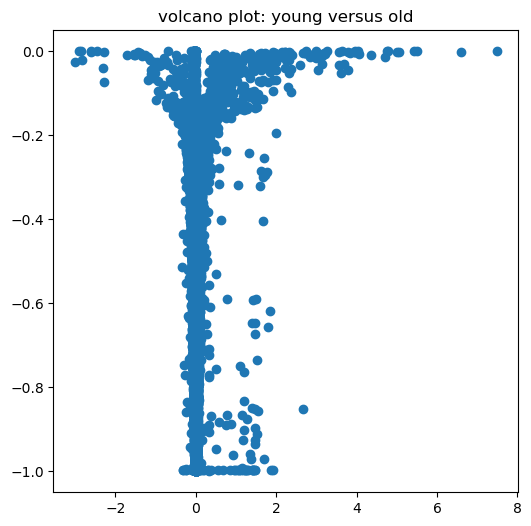

In [89]:
plt.figure(figsize = (6,6))
plt.scatter(results['log2FoldChange'], -results['padj'])
plt.title('volcano plot: young versus old')
plt.show()